In [3]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

cc = pd.read_csv('cacao_flavors.csv')
cc.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
              'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']

In [3]:
display(cc.head())
display(cc.info())

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
bar_id              1795 non-null int64
company             1795 non-null object
specific_origin     1795 non-null object
ref                 1795 non-null int64
review_date         1795 non-null int64
cocoa_percent       1795 non-null object
company_location    1795 non-null object
rating              1795 non-null float64
bean_type           1794 non-null object
broad_origin        1794 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 140.3+ KB


None

1795

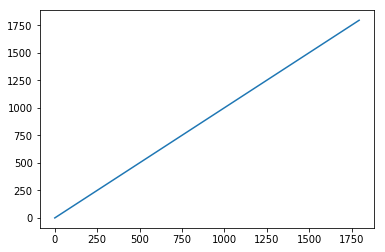

In [4]:
display(cc.bar_id.nunique())
plt.plot(cc.bar_id)

In [5]:
cc.drop(['bar_id'], inplace = True, axis = 1)
cc.company = cc.company.apply(lambda c: None if c.strip() == '' else c)

In [22]:
display(cc.company.describe())

count     1696
unique     407
top       Soma
freq        45
Name: company, dtype: object

In [24]:
display(pd.DataFrame(cc.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cc.company.value_counts()>10).sum())
cc.loc[:, ['company']].info()

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
A. Morin,21
Valrhona,21
Arete,20
Guittard,18
Hotel Chocolat (Coppeneur),18


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
company    1696 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


In [30]:
#cc.specific_origin = cc.specific_origin.apply(lambda s: None if s.strip() == '' else s)
display(cc.specific_origin.describe())
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cc.specific_origin.value_counts()>10).sum())

count           1737
unique          1012
top       Madagascar
freq              55
Name: specific_origin, dtype: object

Значений, встретившихся в столбце более 10 раз: 15


count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

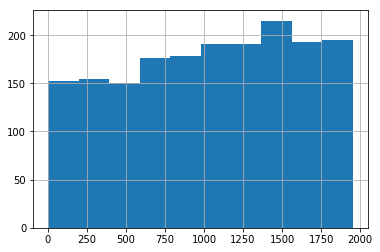

In [6]:
cc.ref.hist()
cc.ref.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

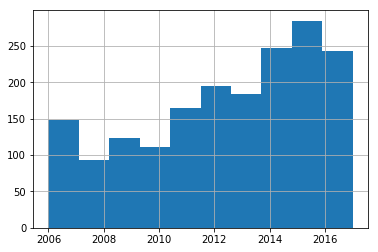

In [32]:
cc.review_date.hist()
cc.review_date.describe()

In [44]:
cc.cocoa_percent = cc.cocoa_percent.apply(lambda x: float(x.replace('%', '')))
cc.cocoa_percent

0        63.0
1        70.0
2       670.0
3        70.0
4        70.0
5        70.0
6        70.0
7        70.0
8        70.0
9        70.0
10       70.0
11       70.0
12       70.0
13       70.0
14       70.0
15       70.0
16       70.0
17       70.0
18       70.0
19       70.0
20       63.0
21       70.0
22       63.0
23       70.0
24       70.0
        ...  
1770     85.0
1771     70.0
1772     78.0
1773     78.0
1774     65.0
1775     68.0
1776     66.0
1777     72.0
1778     80.0
1779     72.0
1780     65.0
1781     70.0
1782     70.0
1783     62.0
1784     75.0
1785    375.0
1786     90.0
1787     70.0
1788     68.0
1789     58.0
1790     70.0
1791     65.0
1792     65.0
1793     62.0
1794     65.0
Name: cocoa_percent, Length: 1795, dtype: float64

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

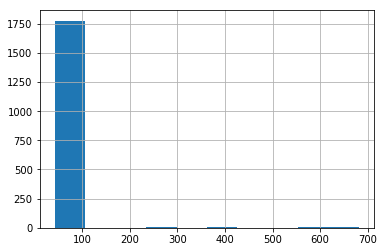

In [45]:
cc.cocoa_percent.hist()
cc.cocoa_percent.describe()

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


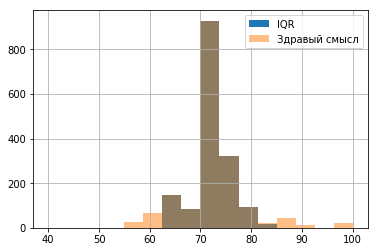

In [48]:
median = cc.cocoa_percent.median()
perc25 = cc.cocoa_percent.quantile(0.25)
perc75 = cc.cocoa_percent.quantile(0.75)
IQR = perc75 - perc25
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cc.cocoa_percent.loc[cc.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cc.cocoa_percent.loc[cc.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

In [49]:
cc = cc.loc[cc.cocoa_percent <= 100]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 9 columns):
company             1678 non-null object
specific_origin     1718 non-null object
ref                 1776 non-null int64
review_date         1776 non-null int64
cocoa_percent       1776 non-null float64
company_location    1776 non-null object
rating              1776 non-null float64
bean_type           1775 non-null object
broad_origin        1775 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 138.8+ KB


None

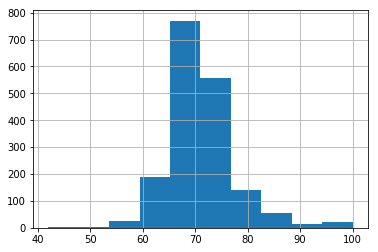

In [52]:
cc.cocoa_percent.hist()
display(cc.info())

In [68]:
cc.company_location

1          France
3          France
4          France
5          France
6          France
8          France
9          France
10         France
11         France
12         France
13         France
14         France
15         France
16         France
17         France
18         France
19         France
20         France
21         France
22         France
23         U.S.A.
24         U.S.A.
25           Fiji
26           Fiji
27           Fiji
          ...    
1769      Austria
1770      Austria
1771      Austria
1772      Austria
1773    Australia
1774    Australia
1775    Australia
1776    Australia
1777    Australia
1778      Austria
1779      Austria
1780      Austria
1781      Austria
1782      Austria
1783      Austria
1784      Austria
1786      Austria
1787      Austria
1788      Austria
1789      Austria
1790      Austria
1791      Austria
1792      Austria
1793      Austria
1794      Austria
Name: company_location, Length: 1690, dtype: object

In [69]:
display(pd.DataFrame(cc.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cc.company_location.value_counts()>10).sum())
cc.loc[:, ['company_location']].info()

,company_location
U.S.A.,726
France,140
Canada,121
U.K.,87
Italy,57
Australia,48
Ecuador,48
Switzerland,36
Germany,34
Belgium,34


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
company_location    1690 non-null object
dtypes: object(1)
memory usage: 106.4+ KB


In [70]:
cc.rating

1       2.75
3       3.50
4       3.50
5       2.75
6       3.50
8       3.75
9       4.00
10      2.75
11      3.00
12      3.25
13      3.75
14      2.75
15      3.00
16      3.25
17      4.00
18      3.25
19      3.50
20      4.00
21      3.50
22      3.75
23      3.75
24      3.75
25      2.75
26      3.25
27      3.50
        ... 
1769    2.75
1770    3.00
1771    3.50
1772    3.50
1773    3.75
1774    3.25
1775    3.50
1776    3.50
1777    3.75
1778    2.75
1779    3.50
1780    3.50
1781    3.00
1782    3.50
1783    3.75
1784    3.00
1786    3.25
1787    3.75
1788    3.25
1789    3.50
1790    3.75
1791    3.00
1792    3.50
1793    3.25
1794    3.00
Name: rating, Length: 1690, dtype: float64

count    1690.000000
mean        3.220710
std         0.416895
min         2.250000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: rating, dtype: float64

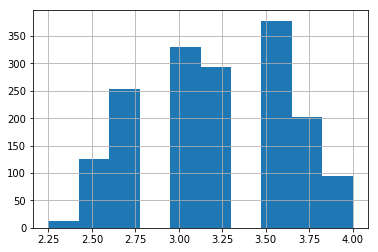

In [71]:
cc.rating.hist()
cc.rating.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


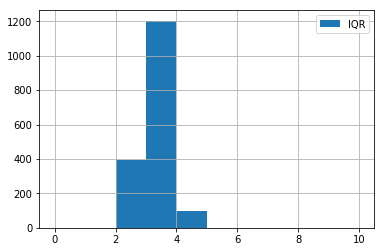

In [57]:
median = cc.rating.median()
IQR = cc.rating.quantile(0.75) - cc.rating.quantile(0.25)
perc25 = cc.rating.quantile(0.25)
perc75 = cc.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cc.rating.loc[cc.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

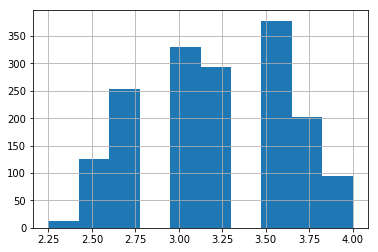

In [72]:
cc = cc.loc[cc.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
cc.rating.hist()

In [60]:
cc.bean_type = cc.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(cc.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cc.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cc.bean_type.nunique())
cc.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
bean_type    861 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


In [61]:
cc.broad_origin = cc.broad_origin.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(cc.broad_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cc.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cc.broad_origin.nunique())
cc.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
Nicaragua,57
Brazil,57
Bolivia,53
Belize,49
Papua New Guinea,41


Значений, встретившихся в столбце более 10 раз: 25
Уникальных значений: 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
broad_origin    1631 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


In [73]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

cc.broad_origin = cc.broad_origin.apply(fix_countries).sort_values()

In [74]:
display(pd.DataFrame(cc.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cc.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cc.broad_origin.nunique())
cc.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
Nicaragua,57
Brazil,57
Bolivia,53
Belize,49
PapuaNewGuinea,41


Значений, упомянутых более 10 раз: 25
Уникальных значений: 93
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
broad_origin    1630 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


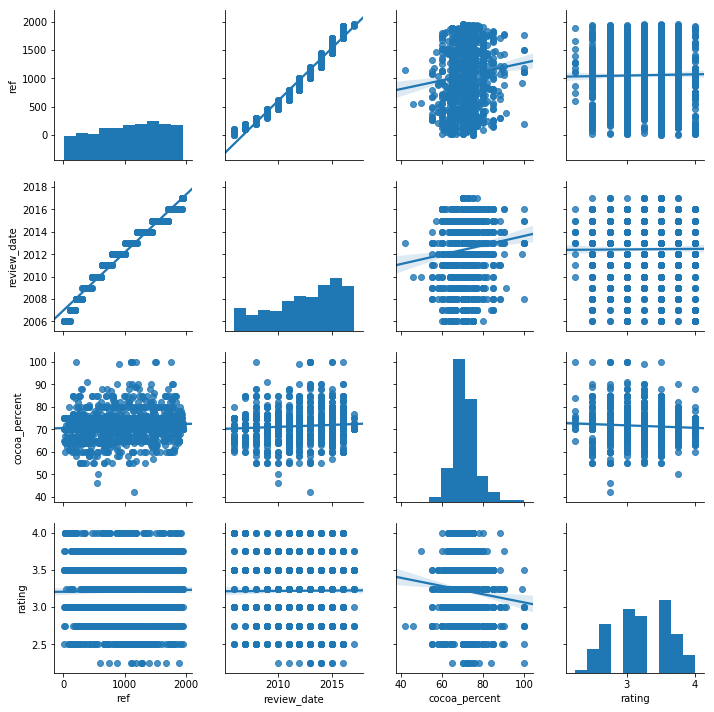

In [75]:
sns.pairplot(cc, kind = 'reg')

In [76]:
cc.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

In [78]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cc.loc[cc.loc[:, column].isin(cc.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

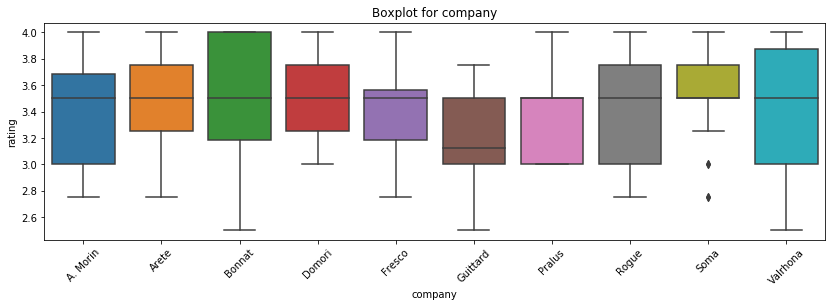

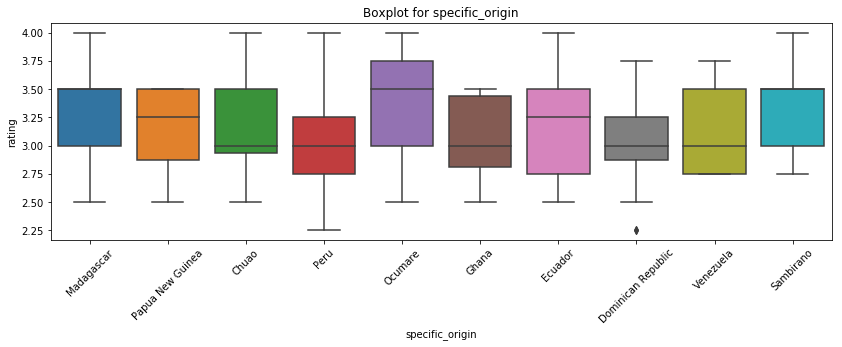

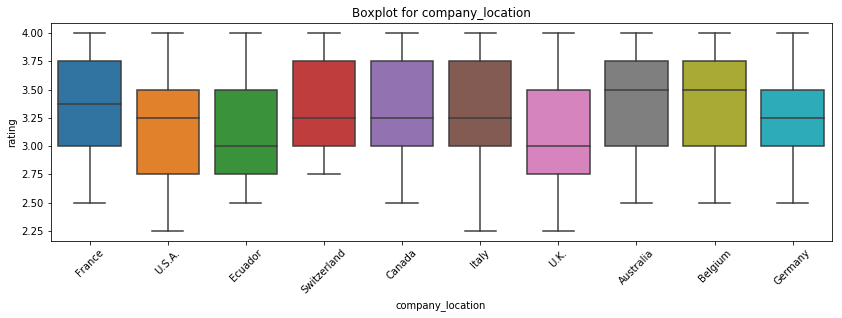

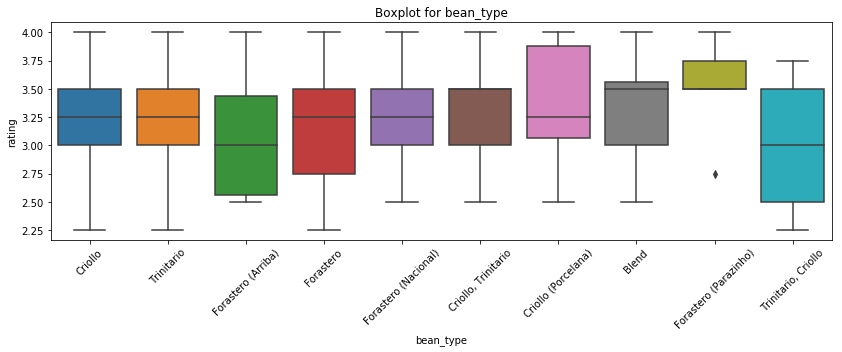

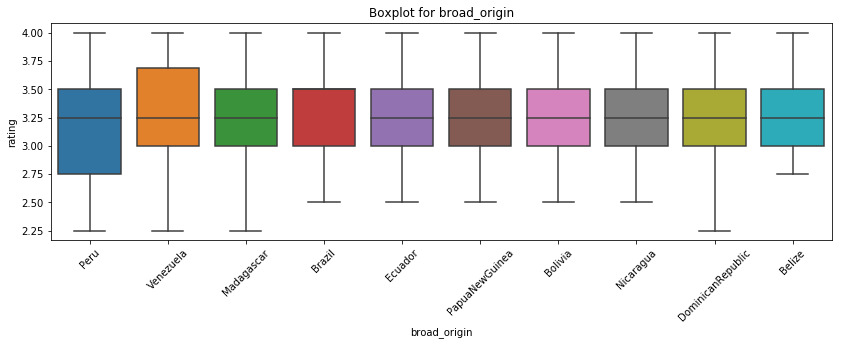

In [79]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме broad_origin, могут влиять на оценку батончика. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [80]:
def get_stat_dif(column):
    cols = cc.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cc.loc[cc.loc[:, column] == comb[0], 'rating'], 
                        cc.loc[cc.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [81]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location
Найдены статистически значимые различия для колонки bean_type


Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: company, specific_origin, company_location, review_date, cocoa_percent.

In [82]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
0,A. Morin,Agua Grande,France,2016,63.0
1,A. Morin,Kpime,France,2015,70.0
2,A. Morin,Atsane,France,2015,670.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0


Итак, в результате EDA для анализа влияния параметров шоколада на экспертную оценку шоколадных батончиков были получены следующие выводы:

В данных достаточно мало пустых значений, только столбец bean_type был заполнен в малом количестве случаев.
Выбросы найдены только в столбцах с рейтингом и содержанием какао в шоколаде батончиков, что позволяет сделать вывод о том, что данные достаточно чистые.
Положительная корреляция параметра review_date и rating может говорить о том, что с годами рейтинги потихоньку завышаются, либо батончики становятся лучше.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это company, specific_origin, company_location, review_date и cocoa_percent.